In [1]:
import numpy as np
from numpy.linalg import solve as solve
import matplotlib.pyplot as plt

In [2]:
def predict(X, y, X_test, noise=0.2, l=1.5):
    n = len(X)
    E_y = y.mean()
    y -= E_y

    K = create_Kernel(X, l=l)
    L = np.linalg.cholesky(K + np.eye(n) * noise**2)
    alpha = solve(L.T, solve(L, y))
    k_star = np.array([sq_exp(x - X_test, l=l) for x in X])
    f_star = k_star.T @ alpha
    v = solve(L, k_star)
    var_f = sq_exp(X_test - X_test, l=l) - v.T@v
    log_marginal_likelihood = -(1/2) * y.T @ alpha - np.sum(np.log(np.diag(L))) - n/2 * np.log(2 * np.pi)
    y += E_y

    return f_star + E_y, var_f + noise ** 2, log_marginal_likelihood

In [3]:
def sq_exp(r, l): 
    return np.exp(-r**2 / (2*l**2))

In [4]:
def create_Kernel(X, l):
    n = len(X)
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K[i][j] = sq_exp(X[i] - X[j], l)
    return K

In [5]:
def plot_confidence(X, y, X_test, l=1.5, noise=0.2):
    pred_mean, pred_var, lml = predict(X, y, X_test, noise=noise, l=l)
    bound = np.diag(pred_var)
    plt.figure(figsize=(12,6))
    plt.plot(X_test, pred_mean);
    plt.plot(X, y, 'o')
    plt.xlim(0.4, 5.1)
    upper = pred_mean + 2 * bound**(1/2)
    lower = pred_mean - 2 * bound**(1/2)
    plt.gca().fill_between(X_test, upper, lower, alpha=0.3);

In [6]:
X = np.array([0.5, 1.1, 1.7, 2.3, 2.9, 3.5, 4.1, 4.7])
y = np.array([2.3, 1.9, 3.3, 5.5, 3.1, 9.1, 7.8, 7.8])
X_test = 3.4

In [7]:
pred_mean, pred_var, lml = predict(X, y, X_test)
"Predicted Mean:", pred_mean, "Predicted Variance:", pred_var, "Log Marginal Likelihood", lml

('Predicted Mean:',
 6.96239343434849,
 'Predicted Variance:',
 0.05700123208781524,
 'Log Marginal Likelihood',
 -168.81070964806068)

In [8]:
X_test = np.linspace(0.5, 5, 100)

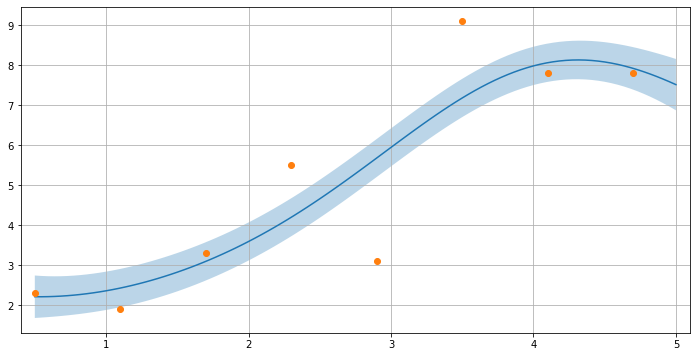

In [9]:
plot_confidence(X, y, X_test)

## Overfitting

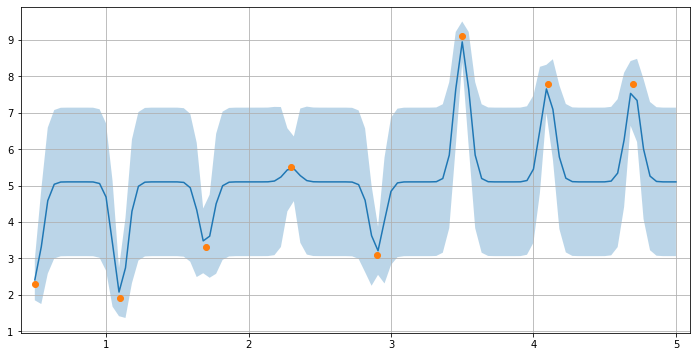

In [10]:
plot_confidence(X, y, X_test, l=0.05)

## Underfitting

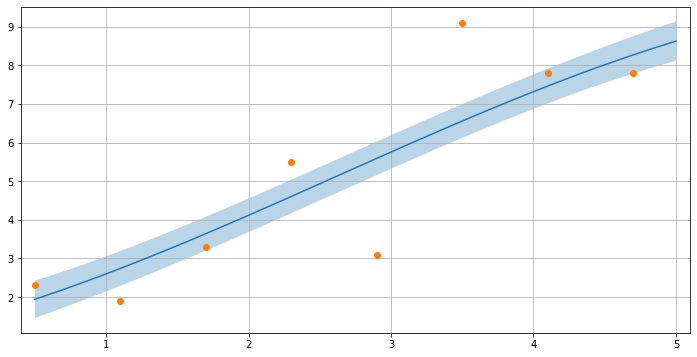

In [11]:
plot_confidence(X, y, X_test, l=5)

## Correct Fit

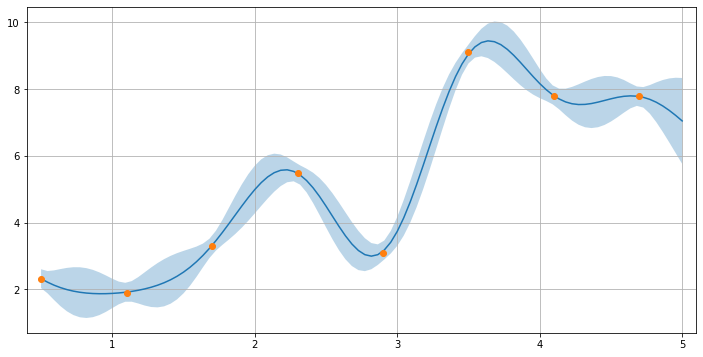

In [12]:
plot_confidence(X, y, X_test, l=0.4, noise=0.1)